In [401]:
import pandas as pd #for reading the dataset
import numpy as np #for plotting
import seaborn as sns #for plotting
import matplotlib.pyplot as plt #for plotting
%matplotlib inline

In [402]:
df = pd.read_csv("https://raw.githubusercontent.com/Jegadit/Customer-Churn-Prediction-Analysis-Using-Ensemble-Techniques/main/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Exploratory Data Analysis

In [403]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [404]:
df.shape

(7043, 21)

In [405]:
df.duplicated().sum()

0

In [406]:
df = df.drop_duplicates(subset= None, keep= 'first', inplace= False, ignore_index= False)
df.duplicated().sum()

0

In [407]:
df.shape

(7043, 21)

In [408]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### FEATURE ENGINEERING

In [409]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [410]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [411]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# DATA VISUALIZATION

<Figure size 2000x600 with 0 Axes>

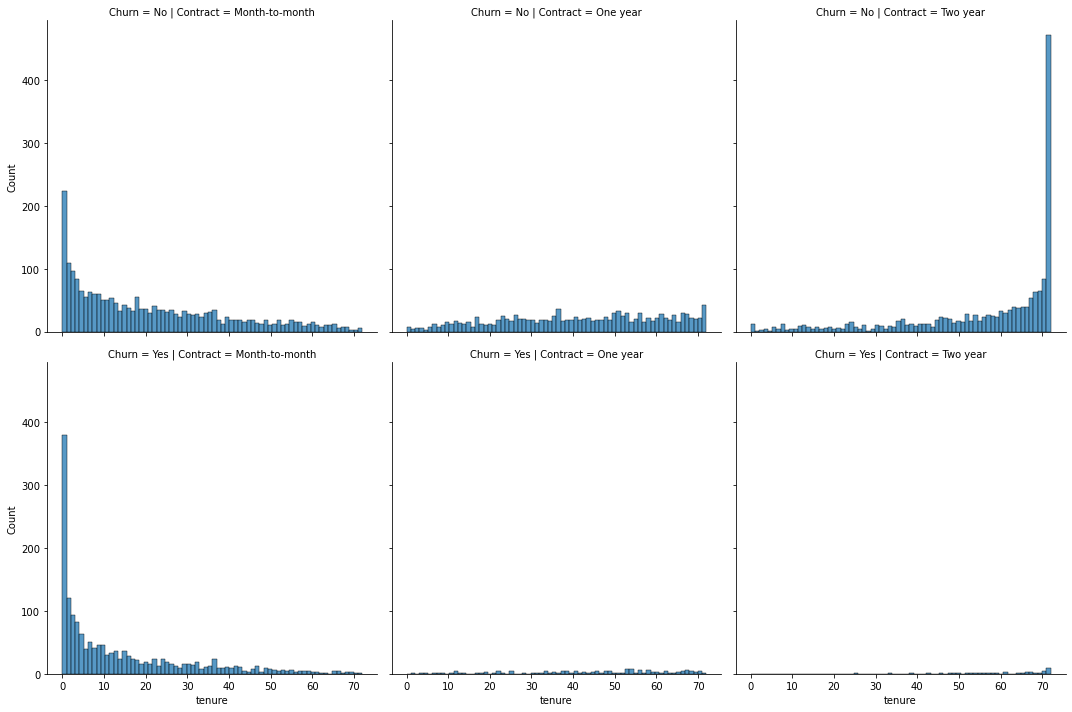

In [412]:
plt.figure(figsize=(10,3),dpi=200)
sns.displot(data=df,x='tenure',bins=70,col='Contract',row='Churn')

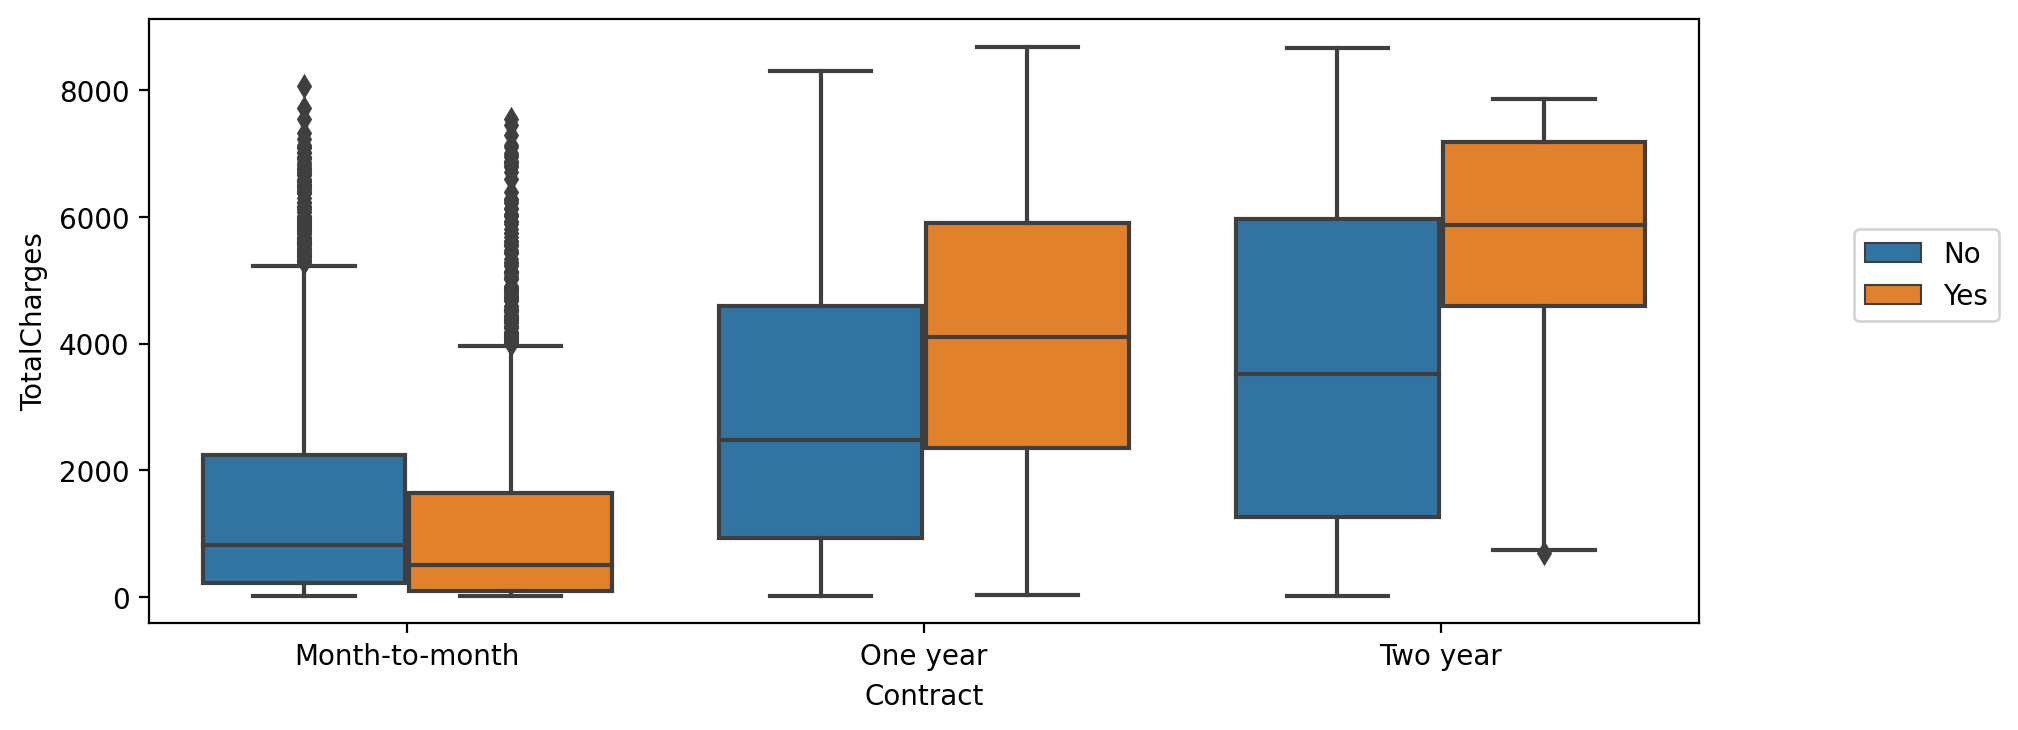

In [413]:
plt.figure(figsize=(10,4),dpi=200)
sns.boxplot(data=df,y='TotalCharges',x='Contract',hue='Churn')
plt.legend(loc=(1.1,0.5))

In [414]:
corr_df  = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']]).corr()

In [415]:
corr_df['Churn_Yes'].sort_values().iloc[1:-1]

Contract_Two year                         -0.302253
StreamingMovies_No internet service       -0.227890
StreamingTV_No internet service           -0.227890
TechSupport_No internet service           -0.227890
DeviceProtection_No internet service      -0.227890
OnlineBackup_No internet service          -0.227890
OnlineSecurity_No internet service        -0.227890
InternetService_No                        -0.227890
PaperlessBilling_No                       -0.191825
Contract_One year                         -0.177820
OnlineSecurity_Yes                        -0.171226
TechSupport_Yes                           -0.164674
Dependents_Yes                            -0.164221
Partner_Yes                               -0.150448
PaymentMethod_Credit card (automatic)     -0.134302
InternetService_DSL                       -0.124214
PaymentMethod_Bank transfer (automatic)   -0.117937
PaymentMethod_Mailed check                -0.091683
OnlineBackup_Yes                          -0.082255
DeviceProtec

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'Contract_Two year'),
  Text(1, 0, 'StreamingMovies_No internet service'),
  Text(2, 0, 'StreamingTV_No internet service'),
  Text(3, 0, 'TechSupport_No internet service'),
  Text(4, 0, 'DeviceProtection_No internet service'),
  Text(5, 0, 'OnlineBackup_No internet service'),
  Text(6, 0, 'OnlineSecurity_No internet service'),
  Text(7, 0, 'InternetService_No'),
  Text(8, 0, 'PaperlessBilling_No'),
  Text(9, 0, 'Contract_One year'),
  Text(10, 0, 'OnlineSecurity_Yes'),
  Text(11, 0, 'TechSupport_Yes'),
  Text(12, 0, 'Dependents_Yes'),
  Text(13, 0, 'Partner_Yes'),
  Text(14, 0, 'PaymentMethod_Credit card (automatic)'),
  Text(15, 0, 'InternetService_DSL'),
  Text(16, 0, 'PaymentMethod_Bank transfer (automatic)'),
  Text(17, 0, 'PaymentMethod_Mailed check'),
  Text(18, 0, 'OnlineBack

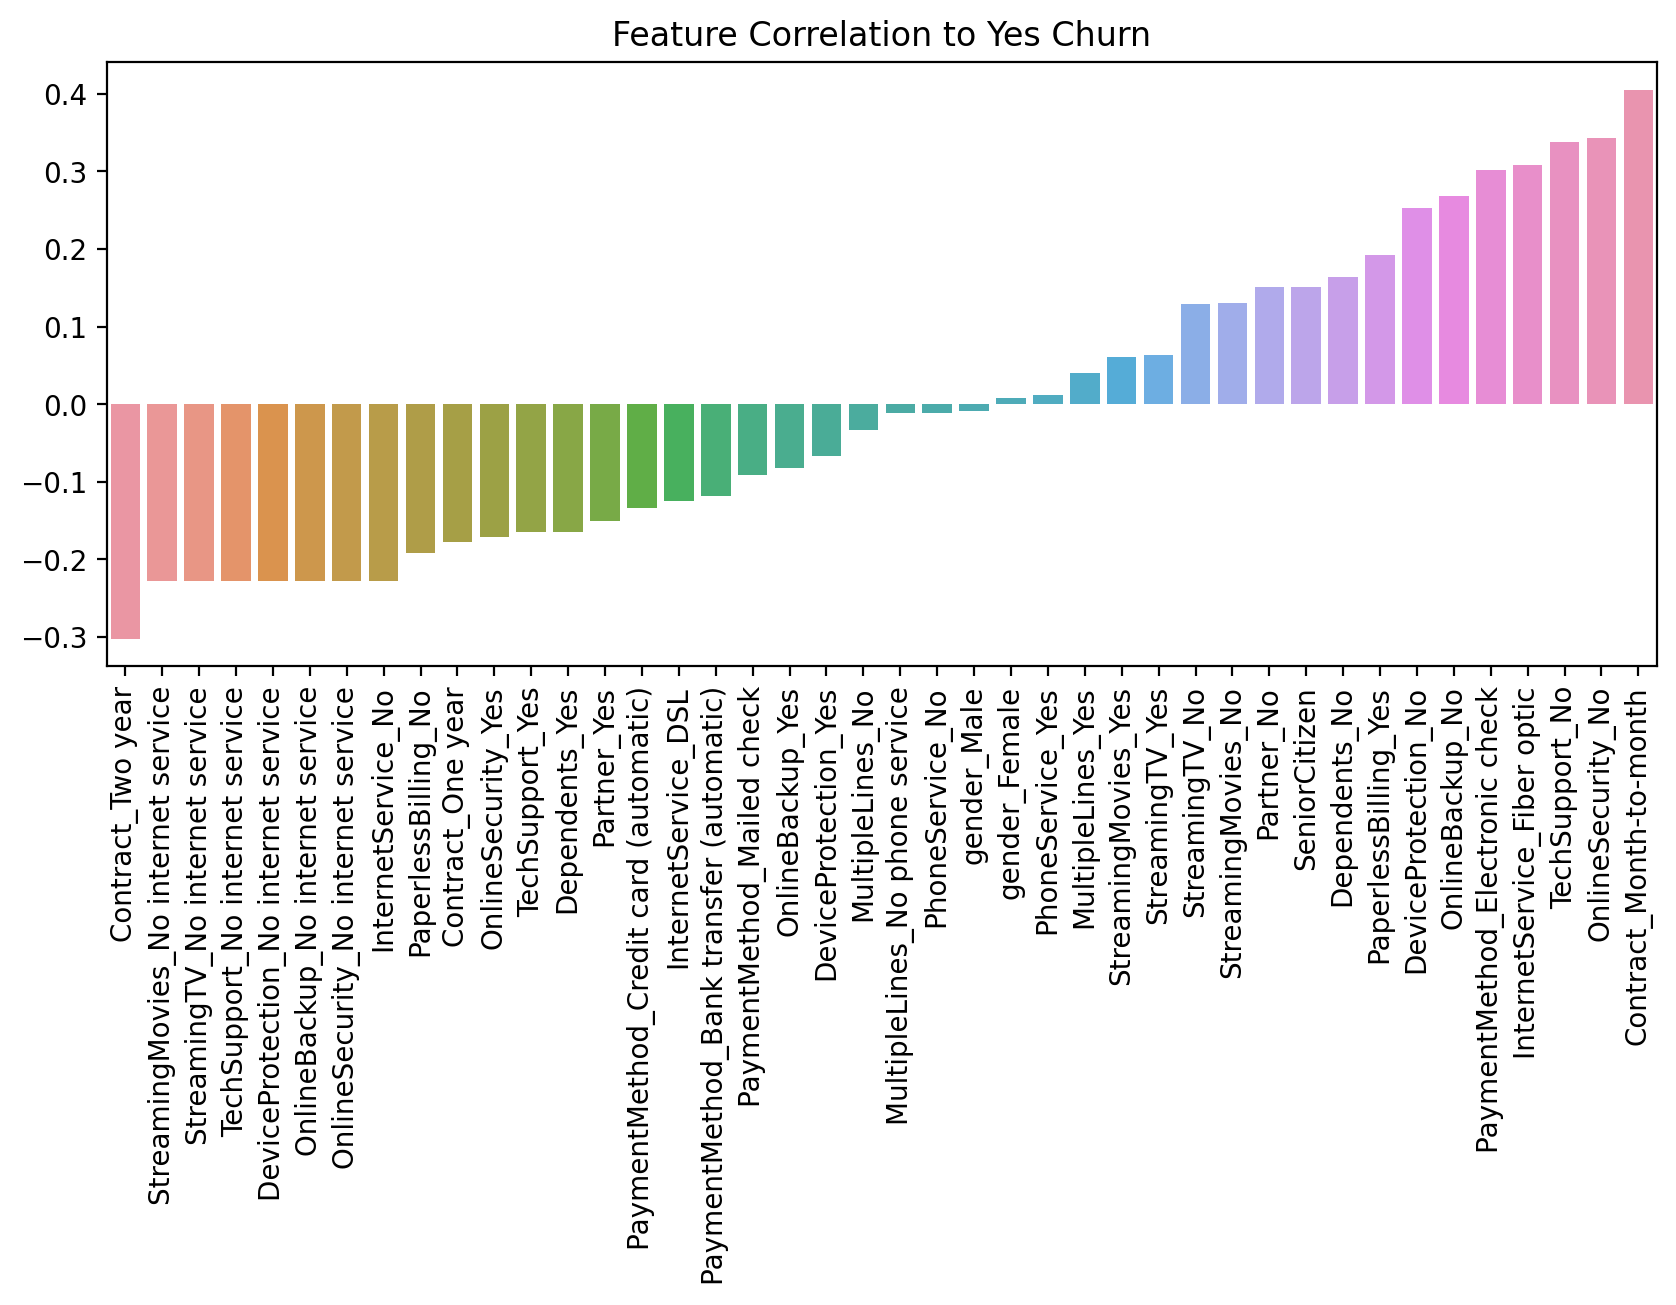

In [416]:
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(x=corr_df['Churn_Yes'].sort_values().iloc[1:-1].index,y=corr_df['Churn_Yes'].sort_values().iloc[1:-1].values)
plt.title("Feature Correlation to Yes Churn")
plt.xticks(rotation=90)

<AxesSubplot:>

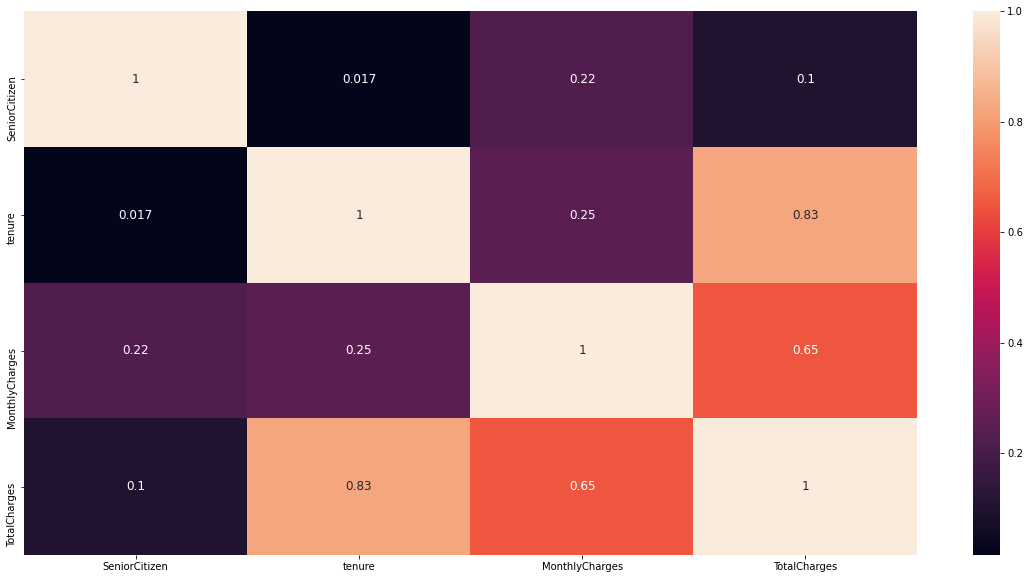

In [417]:
corr=df.corr()
plt.figure(figsize = (20,10))
sns.heatmap(corr, annot=True, annot_kws={'size': 12})

<AxesSubplot:xlabel='tenure'>

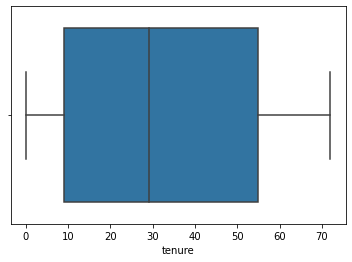

In [418]:
sns.boxplot(x='tenure',data=df)

<AxesSubplot:xlabel='MonthlyCharges'>

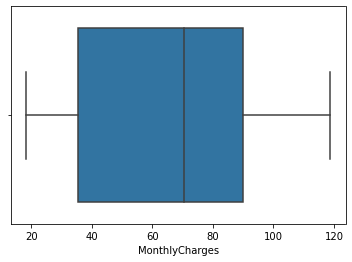

In [419]:
sns.boxplot(x='MonthlyCharges',data=df)

<AxesSubplot:xlabel='TotalCharges'>

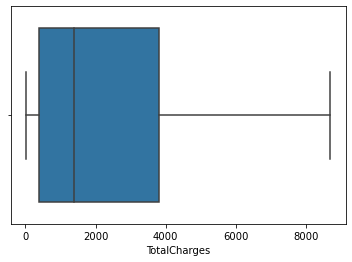

In [420]:
sns.boxplot(x='TotalCharges',data=df)

<AxesSubplot:xlabel='tenure', ylabel='PhoneService'>

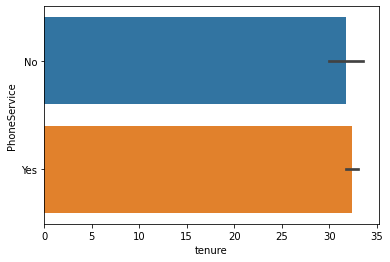

In [421]:
sns.barplot(x='tenure', y='PhoneService', data=df)

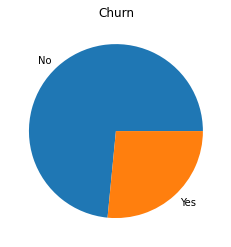

In [422]:
y = df.groupby('Churn').Churn.count()
mylabels = ["No", "Yes"]
plt.title("Churn")
plt.pie(y, labels = mylabels)
plt.show() 

<AxesSubplot:xlabel='Churn', ylabel='SeniorCitizen'>

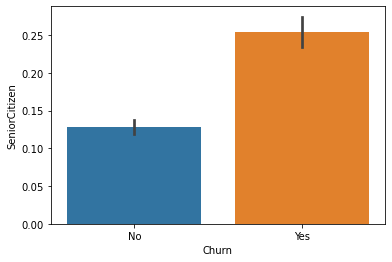

In [423]:
sns.barplot(data= df, x= "Churn", y= "SeniorCitizen")

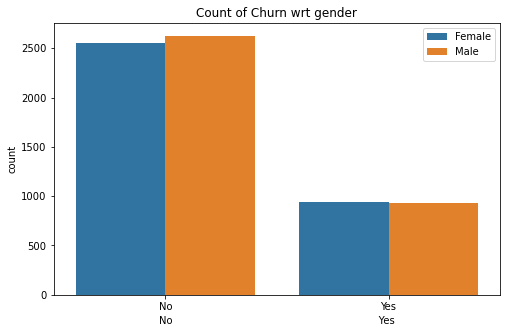

In [424]:
plt.figure(figsize=(8,5))
sns.countplot(x='Churn', hue='gender',data=df)
plt.xlabel('No                                                                  Yes')
plt.title("Count of Churn wrt gender")
plt.legend(['Female','Male'])


### ENCODING & DROPPING

In [425]:
from sklearn.preprocessing import LabelEncoder

cols = df.columns.to_list()

label_encoder = LabelEncoder()
test = df['Churn']
df = df.drop(['Churn'], axis = 1)


for i in range(len(cols)-3):
    df[cols[i]] = label_encoder.fit_transform(df[cols[i]])

df['Churn'] = label_encoder.fit_transform(test)

df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1990.50,0
7039,1525,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,7362.90,0
7040,3367,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,346.45,0
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,306.60,1


### UnderSampling

In [426]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

<AxesSubplot:title={'center':'count (target)'}>

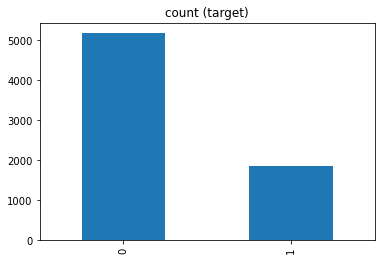

In [427]:
df['Churn'].value_counts().plot(kind='bar', title='count (target)')

In [428]:
# class count
class_count_no, class_count_yes = df['Churn'].value_counts()

# seperate class
class_yes = df[df['Churn'] == 1]
class_no = df[df['Churn'] == 0]

print('class_yes: ', class_yes.shape)
print('class_no: ', class_no.shape)
class_count_yes

class_yes:  (1869, 21)
class_no:  (5174, 21)


1869

<AxesSubplot:title={'center':'count (target)'}>

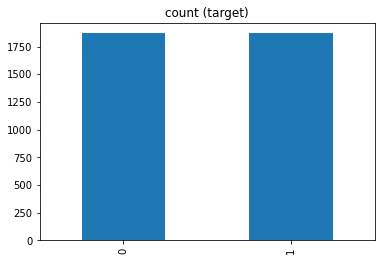

In [429]:
class_no_under = class_no.sample(class_count_yes)
data_sampled = pd.concat([class_no_under,class_yes], ignore_index = True, axis = 0)
data_sampled = data_sampled.sample(frac = 1)
data_sampled['Churn'].value_counts().plot(kind='bar', title='count (target)')

In [430]:
data_sampled

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2477,1832,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,1,2,25.15,25.15,1
2582,787,0,0,0,0,2,1,2,1,0,...,0,0,0,2,0,1,2,85.70,169.80,1
2730,5530,0,0,0,0,4,1,2,1,0,...,0,0,0,0,0,0,0,77.95,305.55,1
1072,4656,0,0,0,0,46,1,0,1,0,...,2,0,0,0,0,1,1,74.80,3548.30,0
2277,2227,0,0,0,0,1,1,0,1,0,...,0,2,2,0,0,0,2,91.70,91.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,4917,1,1,1,1,72,1,2,1,2,...,2,2,2,2,2,1,0,114.95,8196.40,0
3239,186,0,0,1,0,8,1,0,1,0,...,2,0,2,2,0,0,2,101.15,842.90,1
2627,464,0,1,1,1,1,1,0,1,0,...,0,0,0,0,0,1,2,69.25,69.25,1
2110,6646,1,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,1,44.70,44.70,1


# Base line Model

### Dummy Classification

In [431]:
x_dummy = data_sampled['MonthlyCharges']
y_dummy = data_sampled['Churn']

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train_dummy, X_test_dummy, y_train_dummy, y_test_dummy = train_test_split(x_dummy, y_dummy, test_size=0.3, shuffle = True)

In [432]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="uniform")
dummy_clf.fit(X_train_dummy, y_train_dummy)

DummyClassifier(strategy='uniform')

In [433]:
dummy_clf.predict(X_test_dummy)

array([1, 0, 1, ..., 1, 0, 0])

In [434]:
dummy_clf.score(X_test_dummy, y_test_dummy)

0.5124777183600713

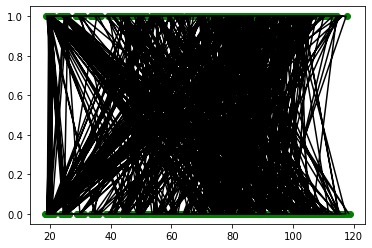

In [435]:
y_pred = dummy_clf.predict(X_test_dummy)
plt.scatter(X_train_dummy, y_train_dummy, color ='g')
plt.plot(X_test_dummy, y_pred, color ='k')

plt.show()

### Logistic Regression

In [436]:
from sklearn.model_selection import train_test_split

x_dummy_for_log = data_sampled['tenure']
y_dummy_for_log = data_sampled['Churn']

x_for_log = np.asanyarray(x_dummy_for_log).reshape(-1, 1)
y_for_log = np.asanyarray(y_dummy_for_log).reshape(-1, 1)

x_train_log, x_test_log, y_train_log, y_test_log = train_test_split(x_for_log, y_for_log, test_size=0.30)

In [437]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()
logisticRegr.fit(x_train_log, y_train_log)

c:\Users\Jegadit\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [438]:
predictions = logisticRegr.predict(x_test_log)

In [439]:
score = logisticRegr.score(x_test_log, y_test_log)
print(score)

0.6827094474153298


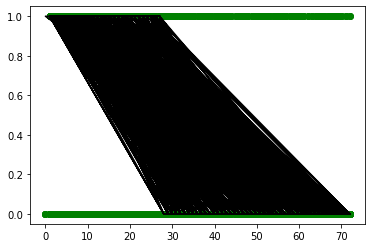

In [440]:
y_pred = logisticRegr.predict(x_test_log)
plt.scatter(x_train_log, y_train_log, color ='g')
plt.plot(x_test_log, y_pred, color ='k')

plt.show()

# Decision Tree

In [441]:
y_for_desctrees = data_sampled['Churn']
x_for_desctrees = data_sampled.drop(['Churn','MonthlyCharges','TotalCharges'], axis = 1)

In [442]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(x_for_desctrees, y_for_desctrees, test_size=0.3, shuffle = True)

dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

[Text(0.6318557023344066, 0.9782608695652174, 'X[15] <= 0.5\nentropy = 1.0\nsamples = 2616\nvalue = [1301, 1315]'),
 Text(0.4076676776678933, 0.9347826086956522, 'X[9] <= 0.5\nentropy = 0.908\nsamples = 1718\nvalue = [556, 1162]'),
 Text(0.23380361660533577, 0.8913043478260869, 'X[5] <= 14.5\nentropy = 0.818\nsamples = 1256\nvalue = [319, 937]'),
 Text(0.12536654783808648, 0.8478260869565217, 'X[8] <= 0.5\nentropy = 0.664\nsamples = 758\nvalue = [131, 627]'),
 Text(0.08831646734130635, 0.8043478260869565, 'X[5] <= 6.5\nentropy = 0.881\nsamples = 250\nvalue = [75, 175]'),
 Text(0.06301747930082796, 0.7608695652173914, 'X[12] <= 1.0\nentropy = 0.778\nsamples = 187\nvalue = [43, 144]'),
 Text(0.03403863845446182, 0.717391304347826, 'X[0] <= 3608.5\nentropy = 0.717\nsamples = 157\nvalue = [31, 126]'),
 Text(0.012879484820607176, 0.6739130434782609, 'X[0] <= 169.5\nentropy = 0.525\nsamples = 76\nvalue = [9, 67]'),
 Text(0.00919963201471941, 0.6304347826086957, 'X[6] <= 0.5\nentropy = 0.918\

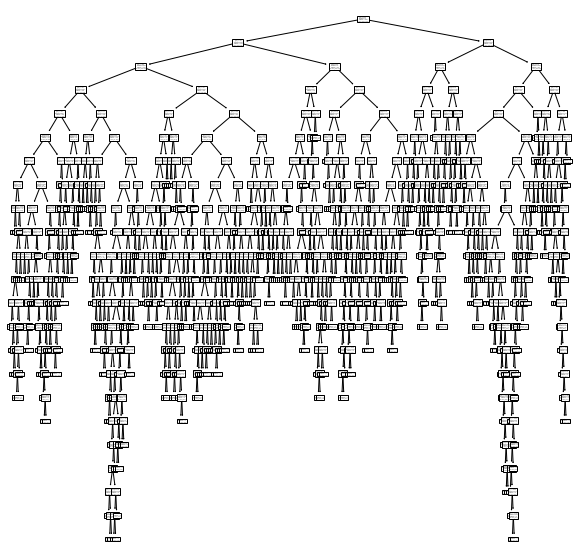

In [443]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=((10,10)))
plot_tree(dtree)

In [444]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

predicitions = dtree.predict(X_test)
acc = accuracy_score(y_test, predicitions)
acc

0.6889483065953654

In [445]:
from sklearn.metrics import classification_report

cr = classification_report(y_test, predicitions)
print(cr)

              precision    recall  f1-score   support

           0       0.70      0.67      0.69       568
           1       0.68      0.71      0.69       554

    accuracy                           0.69      1122
   macro avg       0.69      0.69      0.69      1122
weighted avg       0.69      0.69      0.69      1122

